In [1]:
#Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
%matplotlib inline

In [2]:
#Load DF

file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [3]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [4]:
#Drop unneeded columns

df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#Count frequency of floors

df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<AxesSubplot:xlabel='waterfront', ylabel='price'>

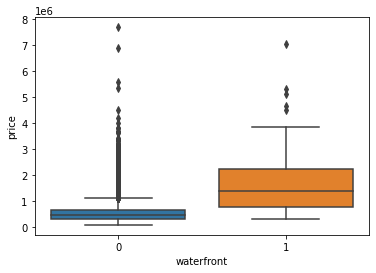

In [7]:
#Create boxplot and look for outliers

sns.boxplot(x='waterfront', y='price', data=df)

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

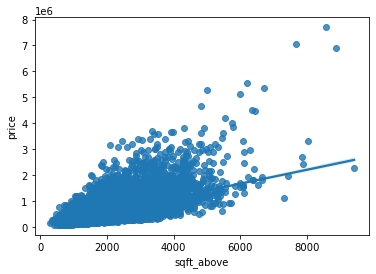

In [8]:
#Create scatter plot with line of best fit for price against sqft_above

sns.regplot(x='sqft_above', y='price', data=df)

In [9]:
#Fit a linear regression model to predict the price using the feature 'sqft_living' then calculate the R^2.

lm = LinearRegression()

X = df[['sqft_living']]
Y = df['price']

lm.fit(X,Y)

print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4928532179037931


In [10]:
#Fit a linear regression model to predict the 'price' using the list of features, Z:

lm2 = LinearRegression()

#Drop Null values:

df.dropna(subset=['bedrooms', 'bathrooms'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

#Create list of features for regression model to predict price

Z = df[['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms',
         'sqft_living15', 'sqft_above', 'grade', 'sqft_living']]

Y1 = df['price']

In [11]:
#Fit Model calculate R^2

lm2.fit(Z, Y1)
print('The R-square is: ', lm2.score(Z, Y1))

The R-square is:  0.657840966129908


In [12]:
#Create a pipeline object that scales the data, performs a polynomial transform, and fits a linear regression model.

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

pipe=Pipeline(Input)

In [13]:
#Fit model calculate R^2

Z = Z.astype(float)
pipe.fit(Z,Y1)
print('The R-square is: ', lm2.score(Z, Y1))

The R-square is:  0.657840966129908


In [14]:
#Create Ridge regression object using the training data, setting the regularization parameter to 0.1
#and calculate the R^2 using the test data. Take a screenshot for your code and the R^2

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Z, Y1, test_size=0.2, random_state=1)

RidgeModel=Ridge(alpha=0.1)

In [15]:
#Fit model calculate R^2

RidgeModel.fit(x_train, y_train)
print('The R-square is: ', RidgeModel.score(x_test, y_test))

The R-square is:  0.6700714818795328


In [16]:
#Perform a second order polynomial transform on both the training data and testing data. 

pr=PolynomialFeatures(degree=2)

Z_pr=pr.fit_transform(Z)
x_train_pr, x_test_pr, y_train_pr, y_test_pr = train_test_split(Z_pr, Y1, test_size=0.2, random_state=1)

In [17]:
#Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1

RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train_pr)

# Calculate the R^2 utilising the test data provided.

print('The R-square is: ', RidgeModel.score(x_train_pr, y_train_pr))

The R-square is:  0.7442469497632174
